In [1]:
import os
os.chdir(r'C:\Users\itwill\Desktop')
print(os.getcwd())

C:\Users\itwill\Desktop


In [2]:
import pandas as pd
data=pd.read_csv('kuma.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   url       252 non-null    object
 1   body      252 non-null    object
 2   hashtags  227 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [3]:
os.chdir(r'C:\Users\itwill')
print(os.getcwd())

C:\Users\itwill


In [4]:
#pd.set_option('display.max_rows', None)  # 행 수 제한 제거
#pd.set_option('display.max_columns', None)  # 열 수 제한 제거
#pd.set_option('display.width', None)  # 열 너비 제한 제거
#pd.set_option('display.max_colwidth', None)  # 열의 내용 길이 제한 제거

In [5]:
data.head()

,url,body,hashtags
0,https://www.instagram.com/p/DKb_okFzAlL/,"센과 치히로의 행방불명 영화 모티브가 된, 쿠로가와 온천마을 ♨️ #일본 #구마모토...",#일본 #구마모토 #쿠로가와
1,https://www.instagram.com/p/DCDsnPbyWKE/,📍일본 구마모토\n\n일본만 20번 넘게 다녀온 찜케터의 최애 일본 여행지가 되어버...,#찜카타고 #스이젠지조주엔 #쿠마몬스퀘어 #쿠로가와온천마을 #시모토리아케이드 #아소...
2,https://www.instagram.com/p/DFIFw1kTfkS/,"누구랑 가도 좋은 일본 소도시의 정석 #제작지원\n\n아기자기하고, 한적한 일본의 ...",#제작지원
3,https://www.instagram.com/p/DFPd5IRvnZU/,대학때 만나 어느새 15년동안 믿고 의지하는 지은이와 두번째 일본여행\n후쿠오카 이...,NaN
4,https://www.instagram.com/p/DASmd4rSVDp/,"후쿠오카 근교여행으로 유후인, 사가, 나가사키는 가봤지만\n구마모토는 처음이였는데....",#일본소도시여행 #구마모토


In [6]:
import re
import emoji
def clean_text(text):
    # 해시태그 제거
    text = re.sub(r'#\S+', '', text)
    
    # 이모지 제거
    text = emoji.replace_emoji(text, replace='')  # 이모지 없애기
    
    # 줄바꿈을 공백으로 변경
    text = re.sub(r'\n', ' ', text)  # 줄바꿈을 공백으로
    
    # 숫자 + 붙어있는 문자들 (단위, 특수문자 등) 제거
    text = re.sub(r'\S*\d\S*', '', text) 
    
    # 특수문자 제거 (알파벳, 숫자, 공백 제외)
    text = re.sub(r'[^\w\s]', '', text)
    
    # 여러 공백을 하나로 합치고 양옆 공백 제거
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

data['body_clean'] = data['body'].apply(clean_text)


In [7]:
data.to_csv('data1.csv', index=False, encoding='utf-8-sig')
data_clean=pd.read_csv('data1.csv',encoding='utf-8-sig')
data_clean

,url,body,hashtags,body_clean
0,https://www.instagram.com/p/DKb_okFzAlL/,"센과 치히로의 행방불명 영화 모티브가 된, 쿠로가와 온천마을 ♨️ #일본 #구마모토...",#일본 #구마모토 #쿠로가와,센과 치히로의 행방불명 영화 모티브가 된 쿠로가와 온천마을 유후인이나 벳푸보다 훨씬...
1,https://www.instagram.com/p/DCDsnPbyWKE/,📍일본 구마모토\n\n일본만 20번 넘게 다녀온 찜케터의 최애 일본 여행지가 되어버...,#찜카타고 #스이젠지조주엔 #쿠마몬스퀘어 #쿠로가와온천마을 #시모토리아케이드 #아소...,일본 구마모토 일본만 넘게 다녀온 찜케터의 최애 일본 여행지가 되어버린 곳 바로 후...
2,https://www.instagram.com/p/DFIFw1kTfkS/,"누구랑 가도 좋은 일본 소도시의 정석 #제작지원\n\n아기자기하고, 한적한 일본의 ...",#제작지원,누구랑 가도 좋은 일본 소도시의 정석 아기자기하고 한적한 일본의 시골을 느끼고 싶으...
3,https://www.instagram.com/p/DFPd5IRvnZU/,대학때 만나 어느새 15년동안 믿고 의지하는 지은이와 두번째 일본여행\n후쿠오카 이...,NaN,대학때 만나 어느새 믿고 의지하는 지은이와 두번째 일본여행 후쿠오카 이후로 거의 이...
4,https://www.instagram.com/p/DASmd4rSVDp/,"후쿠오카 근교여행으로 유후인, 사가, 나가사키는 가봤지만\n구마모토는 처음이였는데....",#일본소도시여행 #구마모토,후쿠오카 근교여행으로 유후인 사가 나가사키는 가봤지만 구마모토는 처음이였는데 이 풍...
...,...,...,...,...
247,https://www.instagram.com/p/CyK-8JIPpZk/,☆일본 큐슈여행 (10.02) / 조사이엔 거리☆\n\n기념품과 먹거리로 가득한 구...,#일본여행 #일본 #일본스타그램 #아리가또 #스미마셍 #구마모토 #큐슈 #구마모토성...,일본 큐슈여행 조사이엔 거리 기념품과 먹거리로 가득한 구마모토 조사이엔 거리 분위기 굿
248,https://www.instagram.com/p/CSO3eN9FG0A/,아름다운 아소 쿠사센리가 바로 보이는 카페 두스누카에서 햄버거 런치🍔눈도 입도 즐거...,#일본 #규슈 #구마모토 #아소 #쿠사센리 #구사센리 #두스누카 #아카우시 #아카우...,아름다운 아소 쿠사센리가 바로 보이는 카페 두스누카에서 햄버거 런치눈도 입도 즐거운...
249,https://www.instagram.com/p/CS_lTtMFkAC/,야마토초에 있는 츠준쿄. 왠만한 폭포보다 시원하다👍🏻🎶\n#일본\n#규슈\n#구마모...,#일본 #규슈 #구마모토 #야마토초 #츠준쿄 #풍경스타그램 #여행스타그램 #시원하다...,야마토초에 있는 츠준쿄 왠만한 폭포보다 시원하다
250,https://www.instagram.com/p/Cw1aGMdrgAA/,#Color_of_Japan\n#구마모토_마운트_아소그린\n\n📍아소산(阿蘇山)\n...,#Color_of_Japan #구마모토_마운트_아소그린 #컬러오브재팬 #Coloro...,아소산阿蘇山 덕분에 산을 사랑하게 되었습니다 구마모토현 동부에 위치한 아소산은 년에...


In [8]:
from konlpy.tag import Okt
okt=Okt()
def extract_nouns(text):
    return okt.nouns(text)

data['nouns']=data['body_clean'].apply(extract_nouns)

In [9]:
data['nouns'].head()

0    [치히로, 행방불명, 영화, 모티브, 쿠로, 온천, 마을, 유후인, 벳푸, 정말, ...
1    [일본, 구마모토, 일본, 찜케터, 최애, 일본, 여행지, 곳, 바로, 후쿠오카, ...
2    [누구, 가도, 일본, 소도시, 정석, 일본, 시골, 분, 추천, 관광객, 음식점,...
3    [대학, 때, 의지, 지은이, 두번째, 일본여행, 후쿠오카, 이후, 거의, 이번, ...
4    [후쿠오카, 근교, 여행, 유후인, 사가, 나가사키, 구마모토, 처음, 이, 풍경,...
Name: nouns, dtype: object

In [10]:
!pip install gensim nltk --quiet

In [18]:
from konlpy.tag import Okt
from gensim import corpora
from gensim.models import LdaModel

repetitive_words = ['구마모토', '여행', '일본']

# 데이터에 필터링된 명사 추가 (길이가 1인 단어 및 불용어 제거)
data['nouns_filtered'] = data['nouns'].apply(lambda x: [word for word in x if word not in repetitive_words and len(word) > 1])


# Dictionary와 Corpus 생성
dictionary = corpora.Dictionary(data['nouns_filtered'])
corpus = [dictionary.doc2bow(text) for text in data['nouns_filtered']]

#LDA모델 생성
lda_model = LdaModel(corpus, num_topics=4, id2word=dictionary, passes=15)

#주제 출력
topics = lda_model.print_topics(num_words=10) 
for topic in topics:
    print(topic)


(0, '0.010*"커피" + 0.006*"시간" + 0.006*"다시" + 0.005*"사진" + 0.005*"쿠마몬" + 0.005*"도시" + 0.004*"아이스크림" + 0.004*"전차" + 0.004*"오늘" + 0.004*"가토"')
(1, '0.013*"분화구" + 0.010*"아소산" + 0.006*"화산" + 0.006*"분위기" + 0.005*"벚꽃" + 0.005*"맥주" + 0.005*"신사" + 0.005*"날씨" + 0.005*"방문" + 0.005*"활화산"')
(2, '0.010*"아소산" + 0.007*"온천" + 0.006*"마을" + 0.006*"쿠마몬" + 0.006*"맛집" + 0.006*"정원" + 0.006*"하나" + 0.006*"추천" + 0.006*"도시" + 0.005*"소도시"')
(3, '0.011*"온천" + 0.008*"사람" + 0.007*"마을" + 0.006*"풍경" + 0.006*"아소산" + 0.006*"료칸" + 0.006*"역시" + 0.005*"자연" + 0.005*"이번" + 0.005*"정말"')


In [12]:
from gensim.models import CoherenceModel
coherence_scores = []
perplexity_scores = []

topic_numbers = list(range(2, 11))

# 각 주제 개수별 LDA 모델 학습 및 평가
for num_topics in topic_numbers:
    
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15,random_state=42)
    
    # Coherence Score 계산
    coherence_model = CoherenceModel(model=lda_model, texts=data['nouns_filtered'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"Num topics: {num_topics}, Coherence Score: {coherence_score}")

Num topics: 2, Coherence Score: 0.33424259635545345
Num topics: 3, Coherence Score: 0.36749464380066993
Num topics: 4, Coherence Score: 0.376668380599709
Num topics: 5, Coherence Score: 0.36844019479605356
Num topics: 6, Coherence Score: 0.3351809803492927
Num topics: 7, Coherence Score: 0.3444829501469531
Num topics: 8, Coherence Score: 0.3648584210103567
Num topics: 9, Coherence Score: 0.3753661593694283
Num topics: 10, Coherence Score: 0.3674965375819193


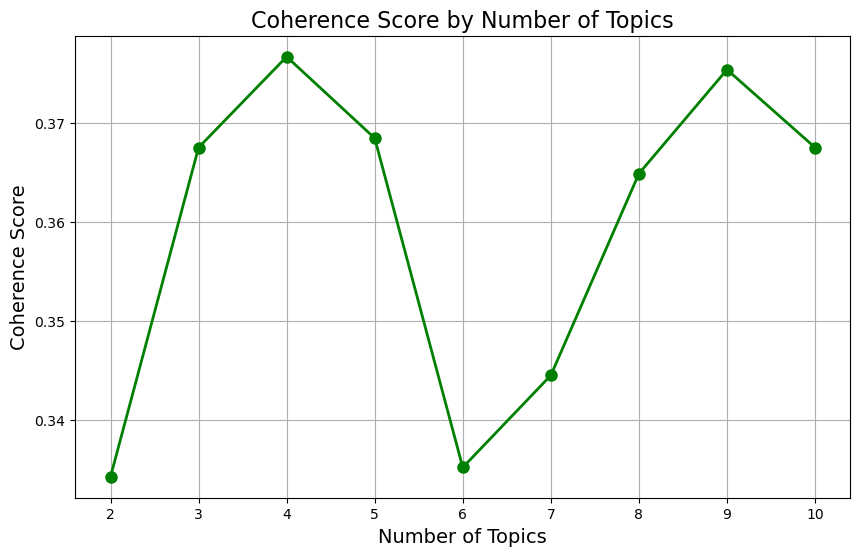

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(topic_numbers, coherence_scores, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.title('Coherence Score by Number of Topics', fontsize=16)
plt.xlabel('Number of Topics', fontsize=14)
plt.ylabel('Coherence Score', fontsize=14)
plt.xticks(topic_numbers)
plt.grid(True)
plt.show()

In [14]:
#LDA모델은 주제 모델링(Topic Modeling)기법 중 하나로, 주어진 문서들에서 숨겨진 주제를 찾아내는 알고리즘. 간단히 말해서, 문서들 속에 
#숨어있는 주제를 찾아내고, 각 문서가 어떤 주제들로 구성되어 있는지 추론
#coherence score:주제 일관성 점수(0~1)
#주제 내 단어들이 서로 잘 연결되어 있는지를 측정
#높을수록 주제 의미가 뚜렷함, 낮을수록 주제 해석이 잘 안되는 것


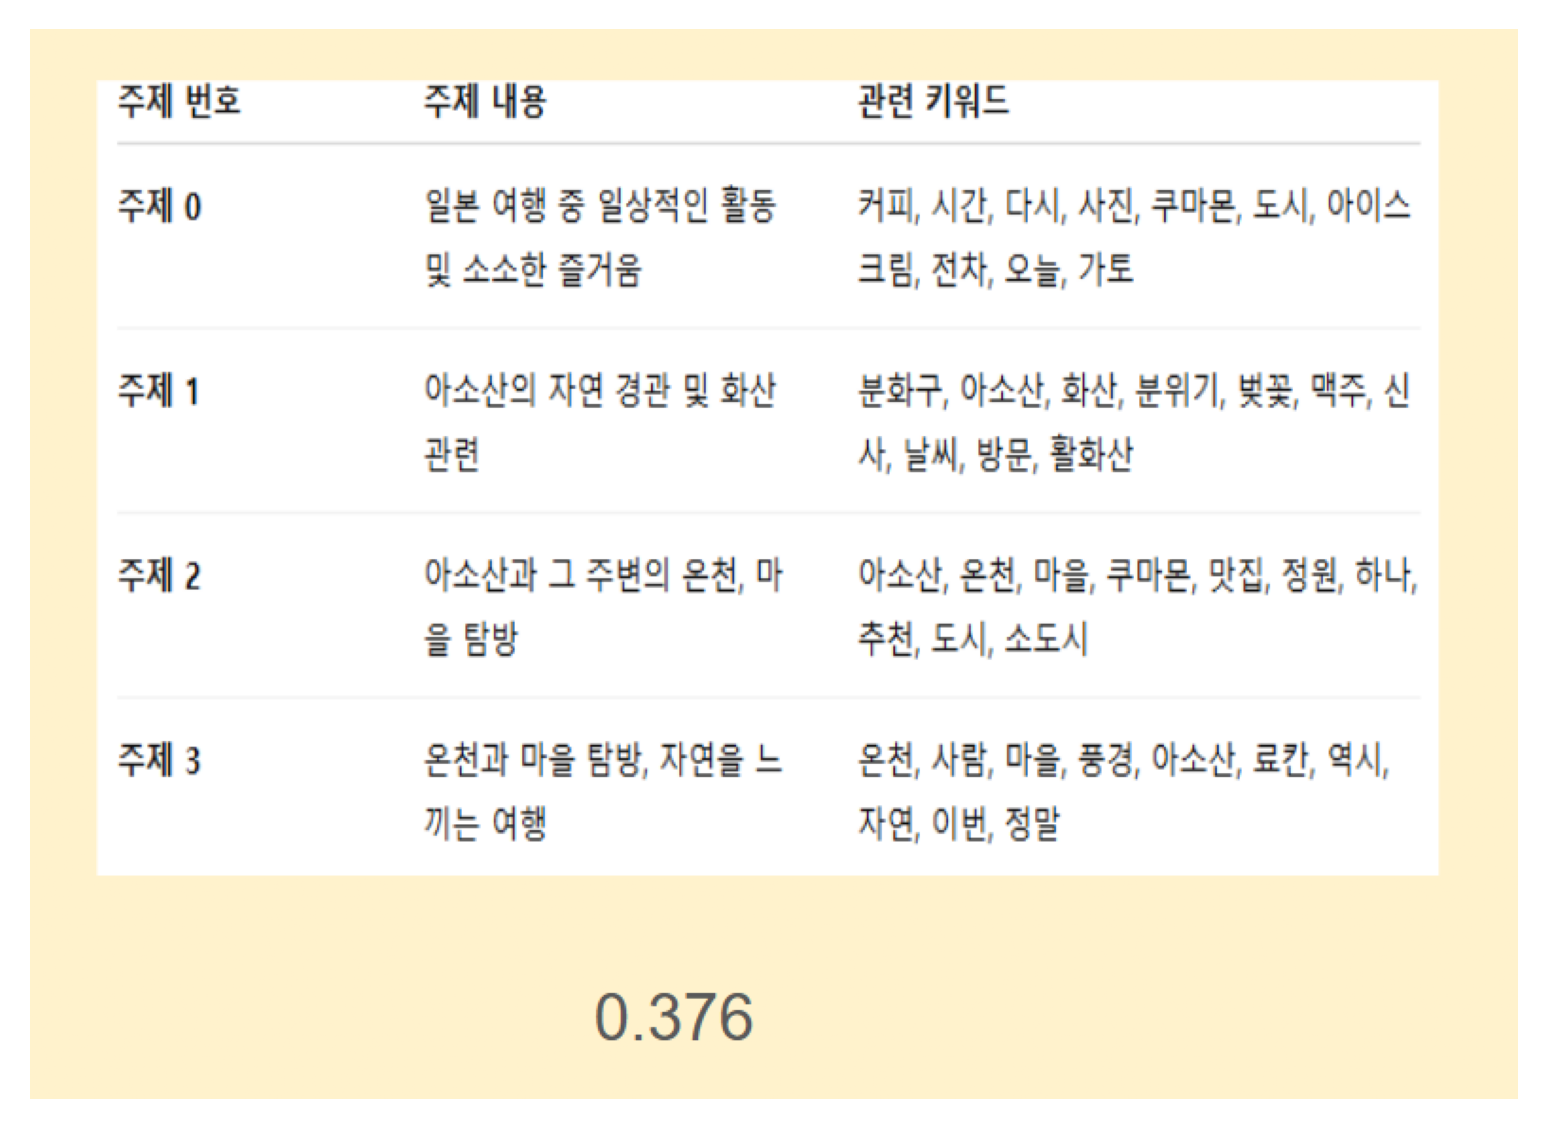

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 경로 설정
img = mpimg.imread(r'C:\Users\itwill\Desktop\cap1.png')

# 이미지를 화면에 표시
plt.figure(dpi=300)
plt.imshow(img)
plt.axis('off')  
plt.show()

In [15]:
data.drop(['nouns_filtered'], axis=1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         252 non-null    object
 1   body        252 non-null    object
 2   hashtags    227 non-null    object
 3   body_clean  252 non-null    object
 4   nouns       252 non-null    object
dtypes: object(5)
memory usage: 10.0+ KB


In [19]:
#해시태그 제거안한 버전

import re
import emoji
def clean_text(text):
    # 해시태그 제거
    #text = re.sub(r'#\S+', '', text)
    
    # 이모지 제거
    text = emoji.replace_emoji(text, replace='')  # 이모지 없애기
    
    # 줄바꿈을 공백으로 변경
    text = re.sub(r'\n', ' ', text)  # 줄바꿈을 공백으로
    
    # 숫자 + 붙어있는 문자들 (단위, 특수문자 등) 제거
    text = re.sub(r'\S*\d\S*', '', text) 
    
    # 특수문자 제거 (알파벳, 숫자, 공백 제외)
    text = re.sub(r'[^\w\s]', '', text)
    
    # 여러 공백을 하나로 합치고 양옆 공백 제거
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

data['body_clean2'] = data['body'].apply(clean_text)


okt=Okt()
def extract_nouns(text):
    return okt.nouns(text)

data['nouns2']=data['body_clean2'].apply(extract_nouns)

from konlpy.tag import Okt
from gensim import corpora
from gensim.models import LdaModel

repetitive_words = ['구마모토', '여행', '일본']

# 데이터에 필터링된 명사 추가 (길이가 1인 단어 및 불용어 제거)
data['nouns_filtered2'] = data['nouns2'].apply(lambda x: [word for word in x if word not in repetitive_words and len(word) > 1])


# Dictionary와 Corpus 생성
dictionary2 = corpora.Dictionary(data['nouns_filtered2'])
corpus2 = [dictionary2.doc2bow(text) for text in data['nouns_filtered2']]

#LDA모델 생성
lda_model2 = LdaModel(corpus2, num_topics=5, id2word=dictionary2, passes=15,random_state=42)

#주제 출력
topics2 = lda_model2.print_topics(num_words=10) 
for topic2 in topics2:
    print(topic2)


from gensim.models import CoherenceModel
coherence_scores2 = []
perplexity_scores2 = []

topic_numbers2 = list(range(2, 11))

# 각 주제 개수별 LDA 모델 학습 및 평가
for num_topics2 in topic_numbers2:
    
    lda_model2 = LdaModel(corpus2, num_topics=num_topics2, id2word=dictionary2, passes=15)
    
    # Coherence Score 계산
    coherence_model2 = CoherenceModel(model=lda_model2, texts=data['nouns_filtered2'], dictionary=dictionary2, coherence='c_v')
    coherence_score2 = coherence_model2.get_coherence()
    coherence_scores2.append(coherence_score2)
    print(f"Num topics: {num_topics2}, Coherence Score: {coherence_score2}")



(0, '0.018*"아소산" + 0.011*"투어" + 0.010*"일본여행" + 0.009*"맥주" + 0.007*"맛집" + 0.007*"분화구" + 0.006*"풍경" + 0.006*"산토리" + 0.006*"공장" + 0.005*"벚꽃"')
(1, '0.015*"분화구" + 0.015*"아소산" + 0.007*"일본여행" + 0.006*"도시" + 0.005*"쿠마몬" + 0.005*"통제" + 0.005*"공원" + 0.005*"보고" + 0.005*"시간" + 0.004*"추천"')
(2, '0.013*"맛집" + 0.011*"일본여행" + 0.009*"라멘" + 0.009*"규슈" + 0.008*"온천" + 0.008*"카츠" + 0.008*"후쿠오카" + 0.008*"그램" + 0.008*"마을" + 0.008*"료칸"')
(3, '0.014*"일본여행" + 0.012*"그램" + 0.012*"온천" + 0.011*"쿠로" + 0.010*"스타" + 0.009*"아소산" + 0.007*"가족" + 0.007*"료칸" + 0.006*"신사" + 0.006*"후쿠오카"')
(4, '0.016*"온천" + 0.011*"아소산" + 0.010*"일본여행" + 0.009*"사람" + 0.007*"커피" + 0.007*"화산" + 0.006*"쿠로" + 0.006*"호텔" + 0.006*"소도시" + 0.006*"후쿠오카"')
Num topics: 2, Coherence Score: 0.3645164331546227
Num topics: 3, Coherence Score: 0.30171686938599995
Num topics: 4, Coherence Score: 0.32180384495345127
Num topics: 5, Coherence Score: 0.3473381015375328
Num topics: 6, Coherence Score: 0.3339797140556251
Num topics: 7, Coherence Score: 0.331485715

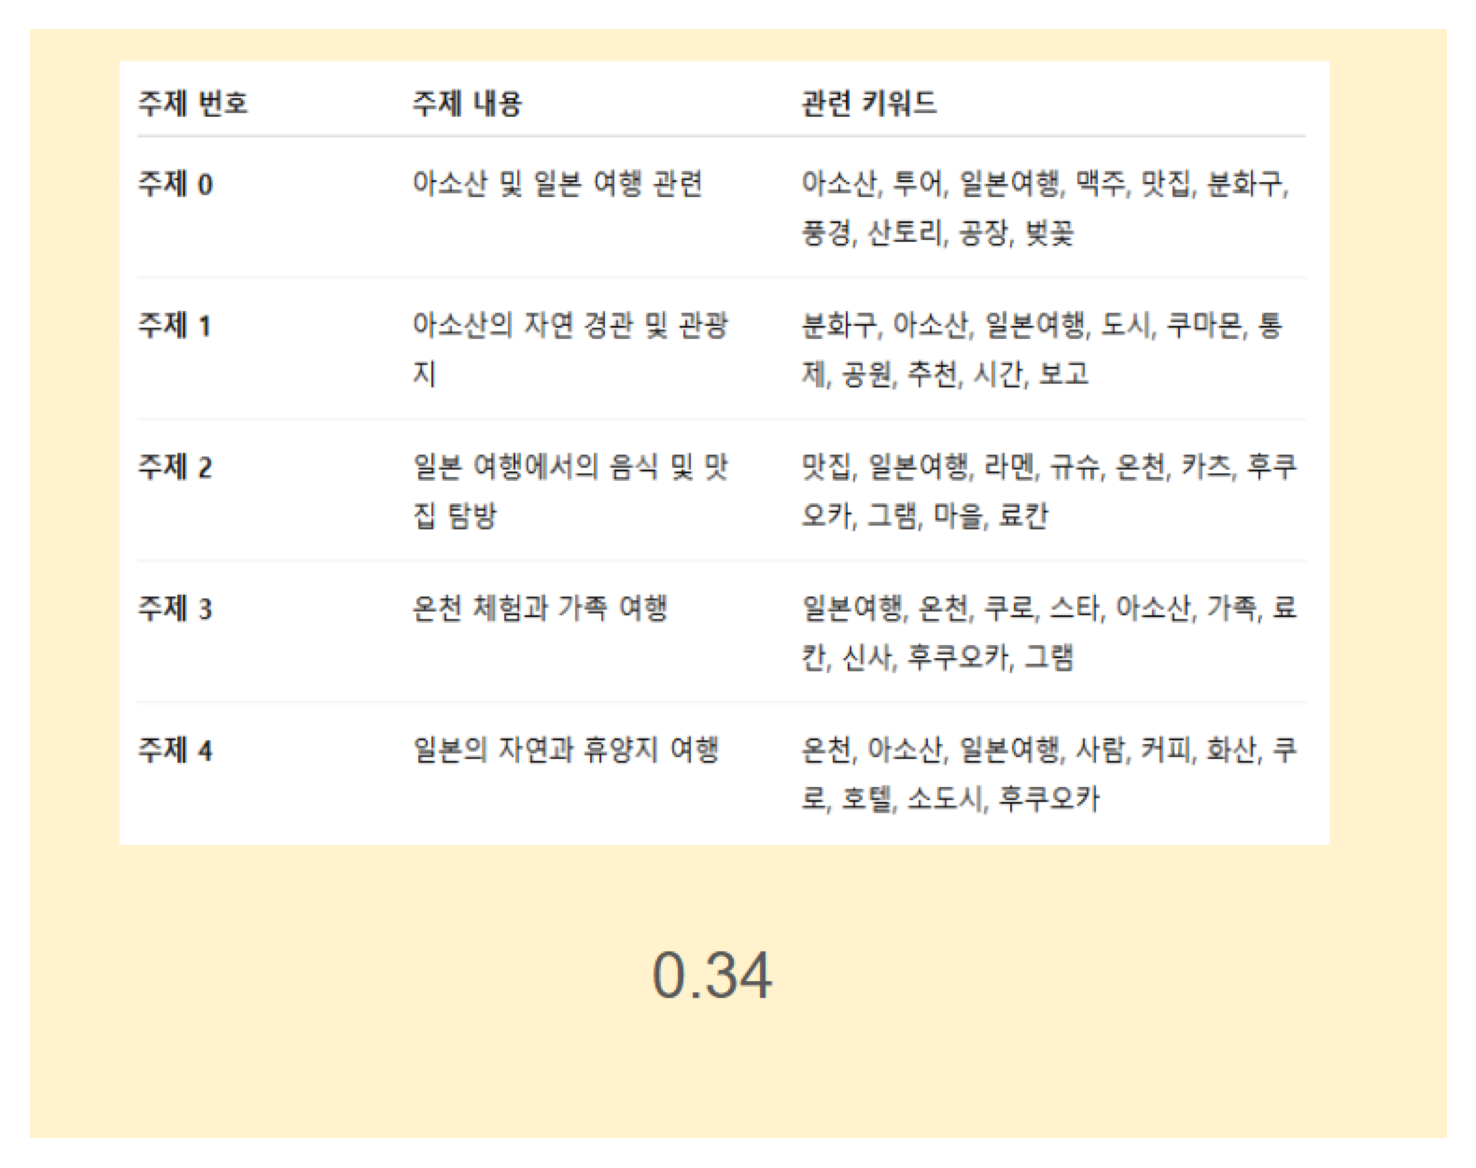

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 경로 설정
img = mpimg.imread(r'C:\Users\itwill\Desktop\cap2.png')

# 이미지를 화면에 표시
plt.figure(dpi=300)
plt.imshow(img)
plt.axis('off')  
plt.show()

In [28]:
data = data.rename(columns={'body_clean2': 'body_clean_hastag_existed'})  #그냥 헷갈려서 이름 잠시 바꾼 것

In [30]:
!pip install vaderSentiment --quiet

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return '긍정적'
    elif sentiment_score['compound'] <= -0.05:
        return '부정적'
    else:
        return '중립적'

# 데이터프레임에 감성 분석 적용
data['sentiment'] = data['body'].apply(analyze_sentiment)

sentiment_counts = data['sentiment'].value_counts()

# 각 감성의 비율 계산
sentiment_percentage = sentiment_counts / len(data) * 100

# 결과 출력
sentiment_summary = pd.DataFrame({
    '감성': sentiment_counts.index,
    '개수': sentiment_counts.values,
    '비율(%)': sentiment_percentage.values
})

print(sentiment_summary)

    감성   개수      비율(%)
0  중립적  190  75.396825
1  긍정적   55  21.825397
2  부정적    7   2.777778


In [43]:
def extract_emojis(text):
    return ''.join([char for char in text if emoji.is_emoji(char)])

# 데이터프레임에 이모지 추출 적용
data['emojis'] = data['body'].apply(extract_emojis)

data['emojis'].nunique() #115개

# 모든 이모지들을 하나로 합침
all_emojis = ''.join(data['emojis'])

# 고유한 이모지 리스트로 변환
unique_emojis = set(all_emojis)

# 고유 이모지 출력
print(unique_emojis)


{'‼', '🐶', '🧳', '▫', '🚙', '👀', '🫢', '🌙', '😝', '🙈', '📌', '🍊', '♨', '🍯', '©', '☺', '😨', '🍃', '😂', '😢', '🥛', '✈', '🫰', '🎍', '😶', '🏯', '🌿', '😉', '☔', '🤭', '🍜', '🌅', '😹', '😊', '🤩', '⏰', '🍵', '🎇', '📆', '🎁', '😭', '🍹', '🏝', '😦', '🚩', '📷', '🍤', '✔', '🗓', '🤹', '😅', '📍', '🚌', '🏔', '🚂', '😛', '🙃', '🌻', '😋', '⛰', '🌋', '🧡', '🚡', '💑', '🌫', '🐟', '🥲', '👍', '🎏', '😄', '🏌', '♂', '🍸', '💓', '🏞', '🐻', '😱', '❗', '💬', '🙏', '❣', '🤗', '⭐', '💛', '🤧', '💙', '👋', '🍦', '⚠', '🎶', '💰', '🥰', '😆', '⛅', '♀', '⛳', '😬', '🤍', '💚', '🧺', '🖼', '✨', '🥹', '💌', '💜', '📸', '➡', '⏩', '🔥', '🚊', '🍣', '🏃', '🎒', '🍔', '🌈', '🔊', '🐎', '🖤', '🏻', '😇', '🚃', '🌲', '🚗', '🍽', '🌸', '🍀', '❤', '🚴', '🫠', '🩷', '🤤', '◽', '🤣', '🐷', '😜', '🫧', '🛍', '🐴', '💼', '💕', '🫡', '🙂', '😳', '〰', '🚄', '💖', '👭', '🛤', '🍴', '😃', '😍', '🐚', '👆', '🏽', '😁', '🛁', '🌊', '⛩', '💨', '✅', '☕', '😀', '🏨', '🌞', '🥂', '☘', '🙋', '🤔', '👏', '🫶', '😌'}


In [49]:
#pd.set_option('display.max_rows', None)  # 행 수 제한 제거
#pd.set_option('display.max_columns', None)  # 열 수 제한 제거
#pd.set_option('display.width', None)  # 열 너비 제한 제거
#pd.set_option('display.max_colwidth', None)  # 열의 내용 길이 제한 제거
##########################################
#1.CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = []

# 텍스트 전처리 함수
def preprocess_text(text):
    # 소문자화
    text = text.lower()
    # 구두점 제거
    text = ''.join([char for char in text if char not in string.punctuation])
    # 토큰화 (단어로 분리)
    words = word_tokenize(text)
    # 불용어 제거
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# 데이터프레임에 텍스트 전처리 적용
data['processed_text'] = data['body'].apply(preprocess_text)

# CountVectorizer를 사용하여 단어 빈도수 계산
vectorizer = CountVectorizer(max_features=300)  # 상위 10개 키워드 추출
X = vectorizer.fit_transform(data['processed_text'])

# 단어 빈도수 계산
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 단어별 빈도수 합산
word_frequency = word_counts.sum().sort_values(ascending=False)

# 결과 출력
print("가장 많이 나온 키워드:")
print(word_frequency.head(300)) 


가장 많이 나온 키워드:
구마모토              352
일본                140
일본여행               99
여행                 76
아소산                71
있는                 58
너무                 57
kumamoto           54
구마모토여행             49
후쿠오카               39
구마모토성              38
아소                 34
japan              31
熊本                 29
규슈                 27
쿠마몬                27
가장                 24
함께                 23
여행스타그램             23
다시                 23
좋은                 23
온천                 22
많이                 21
정말                 21
구마모토의              20
분화구                19
그리고                19
그래도                19
타고                 18
이번                 18
화산                 18
가는                 17
좋았다                17
먹고                 17
있다                 16
있어서                16
료칸                 16
있었다                15
같은                 15
바로                 15
큐슈                 15
작은                 14
특히                 14
구마모토맛집             14
ㅎㅎ                

In [54]:
#2.TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# 명사만 모은 리스트를 문자열로 합쳐서 'tf-idf' 분석
data['nouns_str'] = data['nouns'].apply(lambda x: ' '.join(x))

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['nouns_str'])

# TF-IDF 결과 출력 (단어-행렬)
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 상위 100개의 단어를 출력
top_100_words = tfidf_df.sum(axis=0).sort_values(ascending=False).head(100)
print(top_100_words)


구마모토    17.746402
여행      11.599917
일본      10.426792
아소산      6.074197
온천       5.046002
마을       4.686549
자연       4.397662
쿠마몬      4.185949
소도시      4.121169
료칸       4.109063
시간       4.008416
사람       3.795032
도시       3.791134
날씨       3.783881
분화구      3.704285
정원       3.679614
다시       3.635934
하나       3.541574
사진       3.357287
분위기      3.349729
화산       3.342900
생각       3.323867
신사       3.232395
맛집       3.231104
후쿠오카     3.097016
풍경       3.028851
골프       2.846217
벚꽃       2.769444
바람       2.742519
아침       2.725820
이번       2.705127
보고       2.698307
타고       2.698133
공원       2.672237
가장       2.631913
투어       2.593798
라멘       2.592058
역시       2.584272
구경       2.563662
우리       2.546885
방문       2.543638
정말       2.469451
여기       2.442244
힐링       2.396056
최고       2.369270
조주       2.358646
기억       2.346367
거리       2.300597
진짜       2.253005
추천       2.170250
하루       2.165787
느낌       2.163237
호텔       2.139211
지역       2.122826
시내       2.106121
맥주       2

In [56]:
!pip install wordcloud --quiet

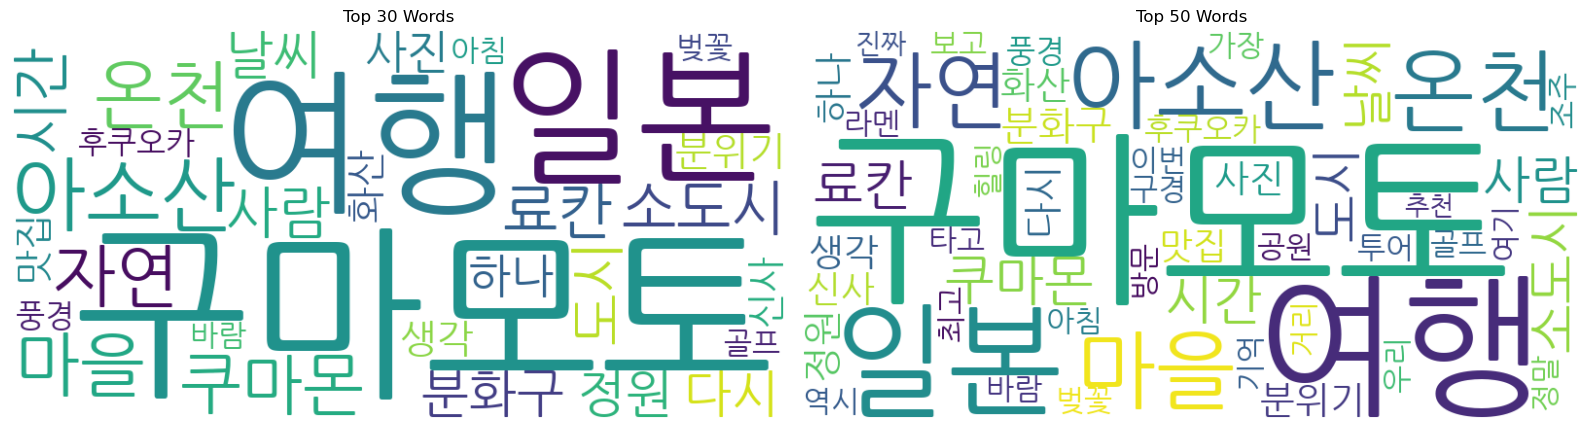

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq = top_100_words.to_dict()


font_path = "C:/Windows/Fonts/NanumGothic.ttf" 
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) 


wordcloud_30 = WordCloud(
    font_path=font_path,
    width=800, 
    height=400, 
    max_words=30,
    background_color='white'
).generate_from_frequencies(word_freq)

axes[0].imshow(wordcloud_30, interpolation='bilinear')
axes[0].axis('off')  
axes[0].set_title('Top 30 Words')  


wordcloud_50 = WordCloud(
    font_path=font_path,
    width=800, 
    height=400, 
    max_words=50,
    background_color='white'
).generate_from_frequencies(word_freq)

axes[1].imshow(wordcloud_50, interpolation='bilinear')
axes[1].axis('off')  
axes[1].set_title('Top 50 Words') 

plt.tight_layout()  
plt.show()

